# Suggestions Model based on Genres


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
df = pd.read_csv('/content/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
x = df.iloc[1]
x

show_id                                                        s2
type                                                      TV Show
title                                               Blood & Water
director                                                      NaN
cast            Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
country                                              South Africa
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                2 Seasons
listed_in         International TV Shows, TV Dramas, TV Mysteries
description     After crossing paths at a party, a Cape Town t...
Name: 1, dtype: object

In [7]:
x['listed_in']

'International TV Shows, TV Dramas, TV Mysteries'

In [27]:
x['listed_in'].replace(' ', '').replace(',', ' ')

'InternationalTVShows TVDramas TVMysteries'

In [28]:
def format_genres_to_strings(row):
  return row['listed_in'].replace(' ', '').replace(',', ' ')

In [29]:
df['genres'] = df.apply(format_genres_to_strings, axis=1)
df['genres']

0                                           Documentaries
1               InternationalTVShows TVDramas TVMysteries
2       CrimeTVShows InternationalTVShows TVAction&Adv...
3                                    Docuseries RealityTV
4         InternationalTVShows RomanticTVShows TVComedies
                              ...                        
8802                          CultMovies Dramas Thrillers
8803                     Kids'TV KoreanTVShows TVComedies
8804                                Comedies HorrorMovies
8805                       Children&FamilyMovies Comedies
8806            Dramas InternationalMovies Music&Musicals
Name: genres, Length: 8807, dtype: object

In [30]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['genres'])
X

<8807x53 sparse matrix of type '<class 'numpy.float64'>'
	with 23285 stored elements in Compressed Sparse Row format>

In [32]:
# generate a mapping from movie title -> index (in df)
title_to_index = pd.Series(df.index, index=df['title'])
title_to_index

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [35]:
idx = title_to_index['Stranger Things']
idx

3685

In [36]:
query = X[idx]
query

<1x53 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [38]:
# printing the query vector as cofusion matrix (mostly 0s)
query.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37364666, 0.37364666, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.50099513, 0.47796999, 0.49124832,
        0.        , 0.        , 0.        ]])

In [39]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0.        , 0.37006313, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
scores = scores.flatten()

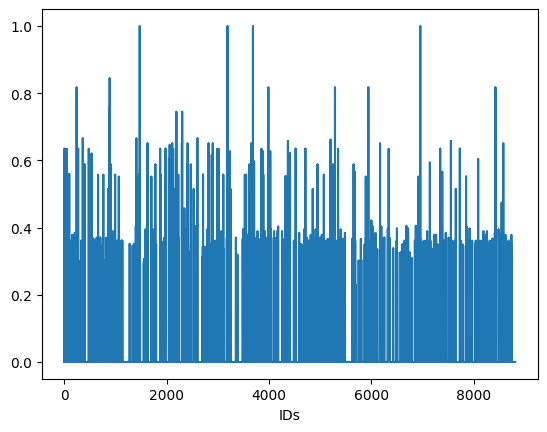

In [43]:
plt.plot(scores)
plt.xlabel('IDs');

In [44]:
# ordering in desc order
(-scores).argsort()

array([3685, 1473, 6953, ..., 3007, 3023, 8806])

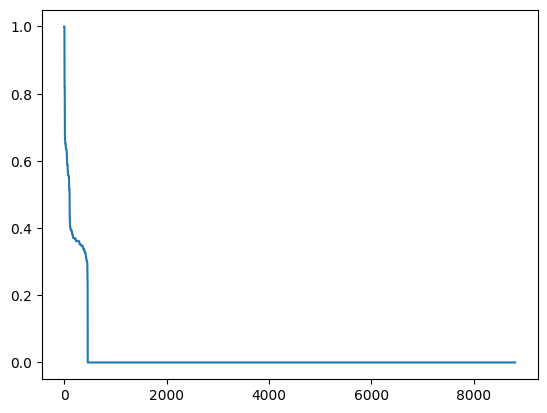

In [45]:
plt.plot(scores[(-scores).argsort()]);

In [50]:
# getting indexes of top 5 matches (excluding queried movie)
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

array([1473, 6953, 3187,  886, 3986])

In [51]:
# convert indices back to titles
df['title'].iloc[recommended_idx]

1473    Chilling Adventures of Sabrina
6953                             Helix
3187                       Nightflyers
886                   The Mystic River
3986                            The OA
Name: title, dtype: object

In [52]:
# create a function that generates recommendations
def recommend(title):
  # get the row in the dataframe for this movie
  idx = title_to_index[title]

  # select only first movie if there are movies with same name
  if type(idx) == pd.Series:
    idx = idx.iloc[0]

  # calculate the pairwise similarity for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  # currently the array is 1 x N, make it a 1-D array
  scores = scores.flatten()

  # getting indexes of top 5 matches (excluding queried movie)
  recommended_idx = (-scores).argsort()[1:6]

  print(f'Recommendations for "{title}":')
  return df['title'].iloc[recommended_idx]

In [55]:
print(recommend('Stranger Things'))

Recommendations for "Stranger Things":
1473    Chilling Adventures of Sabrina
6953                             Helix
3187                       Nightflyers
886                   The Mystic River
3986                            The OA
Name: title, dtype: object


In [56]:
print(recommend('Sherlock'))

Recommendations for "Sherlock":
1166    The Irregulars
5365             Vexed
7333        London Spy
2979      THE STRANGER
3452    Peaky Blinders
Name: title, dtype: object
